# About this Notebook

This is a Python notebook. This is the notebook you'll use to run the analysis code on data sets of your choice, and also to view the resulting histograms from your analysis. This Jupyter notebook is composed of three sections:

1. Executing the *RunAnalysis.py* script which will utilise the current version of *Analysis.py* on your user area to analyse specific data sets of your choosing, and generate histograms from these data sets.

2. Reading in .root files containing the histograms you made from running the *RunAnalysis.py* script, so that you can view them and extract useful numerical information from them.

3. A template for making stacked plots from histograms you have created.

If this is your first time using Jupyter Notebook, and have any questions on how it works, please consult the online user documentation [here](https://jupyter-notebook.readthedocs.io/en/stable/index.html). The 'help' button on the Menu bar at the top of this notebook also contains links to useful online documentation as well as a handy 'User Interface Tour'. ROOT code is used in Sections 2 and 3 of this notebook. If you have any queries concerning the functionality of the ROOT code, you can look specific functions in the [Official ROOT Reference Documentation](https://root.cern.ch/doc/master/index.html). 

One important point to note about using Jupyter notebook is that not all the notebook has to be run every time you want to run any part of the code - each cell can be run seperately.

**IMPORTANT:** Please read and try all three sections of this notebook **before** making any edits to *Analysis.py*, and make sure you understand the functionality of each section.

**IMPORTANT:** It is strongly recommended that only **one** student of a lab pair should edit this notebook and the files contained within the server directories. This is because both students cannot see the same live edit of the notebook or files at the same time, and it is easy to accidently overwrite each other.


# Section 1: Executing RunAnalysis.py

Within this section there is only a single cell which will execute *RunAnalysis.py* when ran. Open running this cell you will be prompted with instructions for how to choose what data sets you analyse, and how much of these data sets you wish to use. 

The cell must be run every time you want to analyse a data set, but be careful - once you have executed the script, output files related to the data sets you used will be generated in the *out* folder within the *ATLAS-Project* directory. If you were to run the script again for the same data sets, the .root files containing your histograms will be overwritten. Therefore it is **essential** to change the names of the .root files you make to something unique, and is clear to what the file refers to (e.g what data set, what selection cuts, etc).

Another crucial point to note: *RunAnalysis.py* will not necessarily use the latest saved version of *Analysis.py*. In order to ensure that the most recent version is used, you **must** restart your kernel before running *RunAnalysis.py* after making changes to *Analysis.py*. You can do this from the 'Kernel' tab on the Menu bar at the top of this notebook. If you have not changed *Analysis.py* since last running the script, there is no need to restart your kernel.

To test the cell below, run it and type "Zee" when prompted for the string code, and type "yes" when prompted if you want to run the analysis using the 1% of the entire data set.

In [1]:
%run 'RunAnalysis.py'



Dont forget you will need to restart the kernel for any edits you have made to Analysis.py to take effect, before running RunAnalysis.py!


Dont forget you will need to restart the kernel for any edits you have made to Analysis.py to take effect, before running RunAnalysis.py!

Welcome to JupyROOT 6.22/00
Please enter a comma-seperated list of decay chains.
Use '+' to add data sets together.
Write 'text' if you would prefer to read a list from 'input.txt':
Welcome to JupyROOT 6.22/00
Please enter a comma-seperated list of decay chains.
Use '+' to add data sets together.
Write 'text' if you would prefer to read a list from 'input.txt':
Zmumu

Would you like to run in fast mode to only analyse 1% of data? (yes/no)

Would you like to run in fast mode to only analyse 1% of data? (yes/no)
yes
Analysing Zmumu...
Analysing Zmumu...
23.392 seconds
Run completed!
23.392 seconds
Run completed!


"Zee" was the "string code" you entered to tell RunAnalysis.py which decay chain to analyse. For future reference, more string codes for different data sets are shown in Table 4 of the Lab script. The full (rather long) list of available data sets can be found in *dataSets.py* in the sub-directory *backend*.

You can tell *RunAnalysis.py* to analyse more than one data set by responding to the prompt with a list of string codes separated by commas. Histograms for each data set will be plotted in separate .root files. Sometimes it is useful to analyse more than one data set and add the results to form a single set of histograms. You can do this by responding to the prompt with string codes separated by plus signs ('+').
  
If you type "text" when asked for datasets the program will read from a list of string codes in the file *input.txt*. This allows you to avoid having to type out a long list of string codes every time you run the analysis.


# Section 2: Viewing your histograms

Within this section there are 3 cells which all contain 3 different parts of the code structure for viewing histograms. The reason the code is split into 3 cells is that not all the cells need to be executed together. The cell structure for this section is as follows:

1. Making essential imports, such as allowing Python to use ROOT
2. Opening .root files and retrieving the histograms stored within
3. Printing the histograms

When viewing your own histograms you will need to edit the code in both the second and third cell for your specific .root files. This includes the .root file names, the histogram names, and choosing what histograms you view.

The third cell is set up so that when using the default version of *Analysis.py*, you are reading in the file *Zee_fast.root* that you will have created in Section 1 of this notebook. From this file you are viewing two of the histograms made: *h_3lep_pt* and *h_lep_mean_pt*.

A note about the third cell: Here TCanvas is used for each histogram you would like to plot. Whenever you want to plot anything with ROOT you use a TCanvas. One is created by default, but it is always useful to create your own so that you can manipulate it better. For more information on TCanvas, please click [here](https://root.cern.ch/doc/master/classTCanvas.html). The third shell is also an example of showing two histograms from the .root file, it can easily be extended to view as many as needed.

In [ ]:
# Making essential imports - This cell only needs to be run ONCE for every new kernel
import ROOT as r
from ROOT import *
import os

In [ ]:
# Open .root file - replace the first arguement with the name of the file
histFile = r.TFile.Open("out/Zee_fast.root","READ")

# Read in histograms - keep variable names clear and suitable for each histogram
# The argument of the 'Get()' function should be the name of the histogram you want to view
# To find out what the histogram names are, look at Analysis.py
hist_3lep_pt = histFile.Get("h_3lep_pt")
hist_lep_pt_mean = histFile.Get("h_lep_pt_mean")

# Change the histogram directories so that they do not disappear once the root file has been closed
hist_3lep_pt.SetDirectory(0)
hist_lep_pt_mean.SetDirectory(0)

# Close .root file
histFile.Close()

In [ ]:
# Allow 'integral' value to be shown in statistics box of all histograms
gStyle.SetOptStat(1111111)

# This next block of code is used to display one histogram - its style must be repeated for every histogram you want to plot.

# FIRST HISTOGRAM

# Make the first canvas 
# For simplicity the variable referring to the canvas should be the same as its name (given by the argument of "TCanvas()")
canvas1 = r.TCanvas("canvas1")

# Draw out the first histogram of your choice onto the canvas
hist_3lep_pt.Draw()

# Show historgram by displaying the canvas
canvas1.Draw()

# SECOND HISTOGRAM

# Make a second canvas
canvas2 = r.TCanvas("canvas2")

# Draw out the second histogram onto this new canvas
hist_lep_pt_mean.Draw()

# Show historgram by displaying this new canvas
canvas2.Draw()

It is important to note that any canvas' you make showing histograms can be saved as images on your computer by right-clicking the image and selecting "Save image as..."

# Section 3: Making stacked plots

This section contains just a single cell which contains code do the following:

1. Open up multiple example .root files and retrieve histograms
2. Make a stacked histogram through the use of THStack, and add the read-in histograms to it
3. Add the histogram referring to ATLAS data so that it can be compared with the MC contributions

For useful information on THStack, please click [here](https://root.cern.ch/doc/master/classTHStack.html)

This is a 'stacked' plot - the histograms of MC contributions are 'stacked' on top of each other. This means that the order in which you add each histogram to the stack will affect each contribution's position in the stacked plot.

Stacked plots can be used to identify the size of different contributions to data.

Beginning with an example stacked plot of mean lepton transverse momentum per event: Run *RunAnalysis.py* using the cell in Section 1 of this notebook, using the string codes "Zee", "Zmumu", "Ztautau" and "2lep", and use fast mode by typing "yes". Then run the cell below to generate the stacked plot. From this plot, you should be able to interpret that the combination of the processes of a Z boson decaying to different same-flavour lepton pairs contributes to most of the ATLAS data set.

These stacked plots can be applied to other histograms, such as those investigating invariant mass.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasstack
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasstack


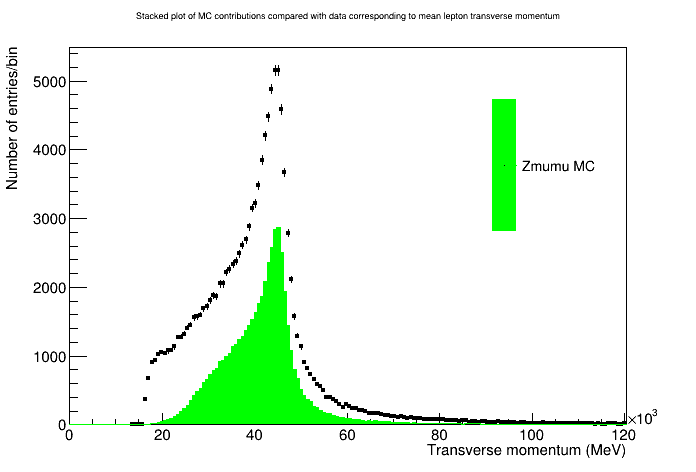

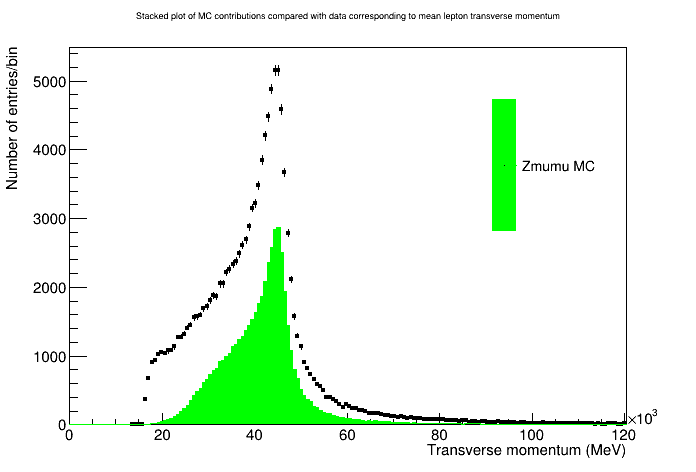

In [8]:
# Opening files up
#histFile_2lep = r.TFile.Open("out/2lep_fast.root","READ")
#histFile_Zee = r.TFile.Open("out/Zee_fast.root","READ")
histFile_Zmumu = r.TFile.Open("out/Zmumu_fast.root","READ")
#histFile_Ztautau = r.TFile.Open("out/Ztautau_fast.root","READ")

# Get histograms
#dataHist = histFile_2lep.Get("h_lep_pt_mean")
#mcHist_Zee = histFile_Zee.Get("h_lep_pt_mean")
mcHist_Zmumu = histFile_Zmumu.Get("h_lep_pt_mean")
#mcHist_Ztautau = histFile_Ztautau.Get("h_lep_pt_mean")

# Change the histograms directory once read in so that they do not get delected when files close
dataHist.SetDirectory(0)
#mcHist_Zee.SetDirectory(0)
mcHist_Zmumu.SetDirectory(0)
#mcHist_Ztautau.SetDirectory(0)

# Close the files
#histFile_2lep.Close()
#histFile_Zee.Close()
histFile_Zmumu.Close()
#histFile_Ztautau.Close()

# MAKING A STACKED PLOT - ALL MC CONTRIBUTIONS STACKED ON TOP OF EACH OTHER, COMPARED WITH DATA

# Make a canvas
canvasstack = r.TCanvas("canvasstack")

# Make a stacked histogram
hs = r.THStack("hs","Stacked plot")

# Configure and plot the 2lep data
dataHist.SetTitle("Stacked plot of MC contributions compared with data corresponding to mean lepton transverse momentum")
dataHist.GetXaxis().SetTitle("Transverse momentum (MeV)")
dataHist.GetYaxis().SetTitle("Number of entries/bin")
dataHist.SetStats(0)
dataHist.SetLineColor(r.kBlack)
dataHist.SetLineWidth(1)
dataHist.SetMarkerColor(r.kBlack)
dataHist.SetMarkerStyle(21)
dataHist.SetMarkerSize(0.5)
dataHist.Draw("e")

# Add MC contributions to the stacked histogram
#mcHist_Zee.SetLineColor(r.kBlue)
#mcHist_Zee.SetFillColor(r.kBlue)
#hs.Add(mcHist_Zee,"h")
mcHist_Zmumu.SetLineColor(r.kGreen)
mcHist_Zmumu.SetFillColor(r.kGreen)
hs.Add(mcHist_Zmumu,"h")
#mcHist_Ztautau.SetLineColor(r.kRed)
#mcHist_Ztautau.SetFillColor(r.kRed)
#hs.Add(mcHist_Ztautau,"h")

# Draw the stacked plot onto the canvas
hs.Draw("same,hist")

# Draw the data on the same canvas
#dataHist.Draw("e,same")

# Edit the x axis range of both stacked plot and data
hs.GetXaxis().SetRangeUser(0,120e3)
#dataHist.GetXaxis().SetRangeUser(0,120e3)

# Add a legend to the plot
legend = r.TLegend(0.7,0.45,0.9,0.85)
#legend.AddEntry(mcHist_Zee,"Zee MC")
legend.AddEntry(mcHist_Zmumu,"Zmumu MC")
#legend.AddEntry(mcHist_Ztautau,"Ztautau MC")
#legend.AddEntry(dataHist,"2lep Data")
legend.SetLineWidth(0)
legend.Draw("same")

# Plot the canvas
canvasstack.Draw()


## Appendix

### Frequenctly asked questions

**What do I do if I get a pop-up message saying I have lost connection?**

If this happens to you and you are connected to the internet, first copy all cells to a text editor file that you editted since the notebook was last saved. Then close all Jupyter windows in your browser. After this, please go to the terminal window you used to complete steps 4-9 of Section 5.3 of the lab script, and a message should display saying "connection reset...". Starting from the new command line that should appear, please complete steps 5-9 again of Section 5.3 of the lab script. Once you are back using Jupyter, return to the notebook, and copy and paste any material necessary from the notepad file you made to the appropriate place. If this happens to you and you are not connected to the internet anymore, first try to reconnect to the internet BEFORE completing the steps above.

**Why did my cell output change the second time I ran it, when it shouldn't have changed?**

This is most likely due to at least one of the following:

1. Any files you have read in may not be the same as they were before. To avoid this you need to rename your .root files after every run of *RunAnalysis.py* to prevent them from being overwritten.
2. Any variables that are used in the cell may have been redefined outside of this cell. To avoid this, do not redefine variables in different cells unless necessary, e.g do not use 'canvas' for all your TCanvas variable names.

**Why can't I read in the new histograms I made?**

This is most likely because you did not restart the kernel before running *RunAnalysis.py*. This would mean the previous version of *Analysis.py* is being used by *RunAnalysis.py*, in which the histograms you are trying the access did not exist. Always make sure you save *Analysis.py* if you have made changes to it, and then restart your kernel before running the script.